In [19]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pickle

In [2]:
df1 = pd.read_csv('f1_race_Data_2023.csv')
df2 = pd.read_csv('f1_race_Data_2024.csv')
df3 = pd.read_csv('f1_race_Data_2025.csv')

In [3]:
df1.head(), df2.head(), df3.head()
df1.shape, df2.shape, df3.shape

((438, 16), (478, 16), (418, 16))

In [4]:
# Merge datasets
df = pd.concat([df1, df2, df3], ignore_index=True)
df.shape

(1334, 16)

In [5]:
df.head()

,grandprix,year,driver_name,driver_code,driver_number,track,track_type,wet_dry,fastest_lap_time,avg_lap_time,avg_sector_1_time,avg_sector_2_time,avg_sector_3_time,pitstops,grid_position,finished_position
0,Bahrain Grand Prix,2023,Max VERSTAPPEN,VER,1,Sakhir,circuit,dry,96.236,98.163870,32.075145,42.667679,24.161589,2,1.0,1.0
1,Bahrain Grand Prix,2023,Logan SARGEANT,SAR,2,Sakhir,circuit,dry,96.037,99.343173,32.624818,43.343527,24.595600,3,16.0,12.0
2,Bahrain Grand Prix,2023,Lando NORRIS,NOR,4,Sakhir,circuit,dry,95.257,99.404542,34.876111,43.082037,24.597556,6,11.0,17.0
3,Bahrain Grand Prix,2023,Pierre GASLY,GAS,10,Sakhir,circuit,dry,95.068,98.710000,32.592107,42.921625,24.501268,3,20.0,9.0
4,Bahrain Grand Prix,2023,Sergio PEREZ,PER,11,Sakhir,circuit,dry,96.344,98.334778,31.969839,42.890232,24.205286,2,2.0,2.0


In [6]:
df.info(), df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   grandprix          1334 non-null   object 
 1   year               1334 non-null   int64  
 2   driver_name        1334 non-null   object 
 3   driver_code        1334 non-null   object 
 4   driver_number      1334 non-null   int64  
 5   track              1334 non-null   object 
 6   track_type         1334 non-null   object 
 7   wet_dry            1334 non-null   object 
 8   fastest_lap_time   1296 non-null   float64
 9   avg_lap_time       1296 non-null   float64
 10  avg_sector_1_time  1296 non-null   float64
 11  avg_sector_2_time  1296 non-null   float64
 12  avg_sector_3_time  1296 non-null   float64
 13  pitstops           1334 non-null   int64  
 14  grid_position      1312 non-null   float64
 15  finished_position  1190 non-null   float64
dtypes: float64(7), int64(3),

(None,
 grandprix              0
 year                   0
 driver_name            0
 driver_code            0
 driver_number          0
 track                  0
 track_type             0
 wet_dry                0
 fastest_lap_time      38
 avg_lap_time          38
 avg_sector_1_time     38
 avg_sector_2_time     38
 avg_sector_3_time     38
 pitstops               0
 grid_position         22
 finished_position    144
 dtype: int64)

## Data Visualizations & Insights
Let's explore the F1 race dataset with some visualizations to gain insights into driver performance, race conditions, and other key metrics.

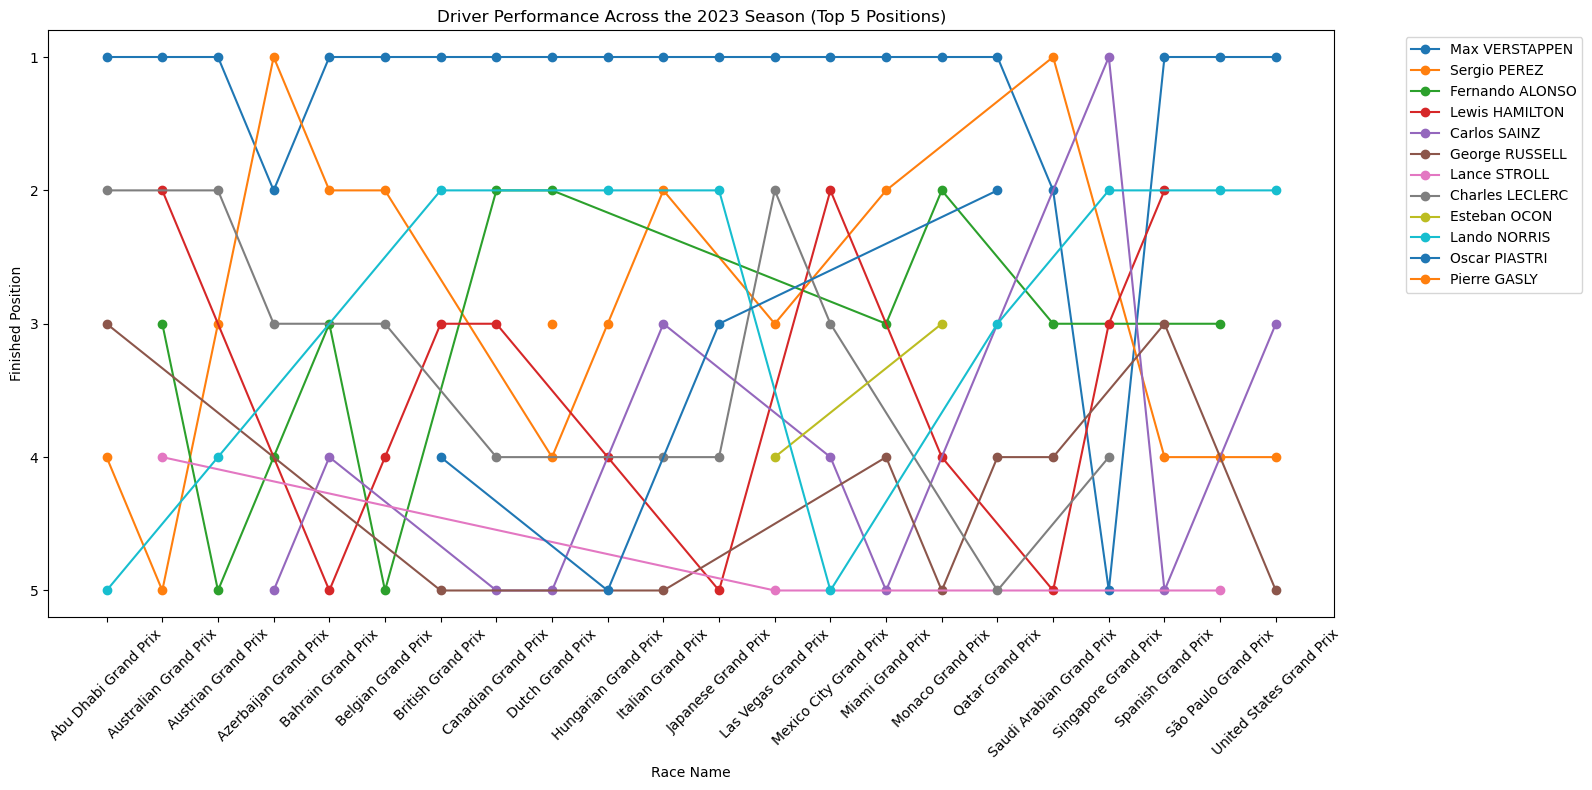

In [59]:
# Driver performance across the 2023 season (Top 5)
df_2023_top10 = df[(df['year'] == 2023) & (df['finished_position'] <= 5) & (df['finished_position'] >= 1)]
race_names = df_2023_top10['grandprix'].unique()
plt.figure(figsize=(16,8))
for driver in df_2023_top10['driver_name'].unique():
    driver_data = df_2023_top10[df_2023_top10['driver_name'] == driver].sort_values(['grandprix'])
    plt.plot(driver_data['grandprix'], driver_data['finished_position'], marker='o', label=driver)
plt.gca().invert_yaxis()  # 1st place at top
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Driver Performance Across the 2023 Season (Top 5 Positions)')
plt.xlabel('Race Name')
plt.ylabel('Finished Position')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

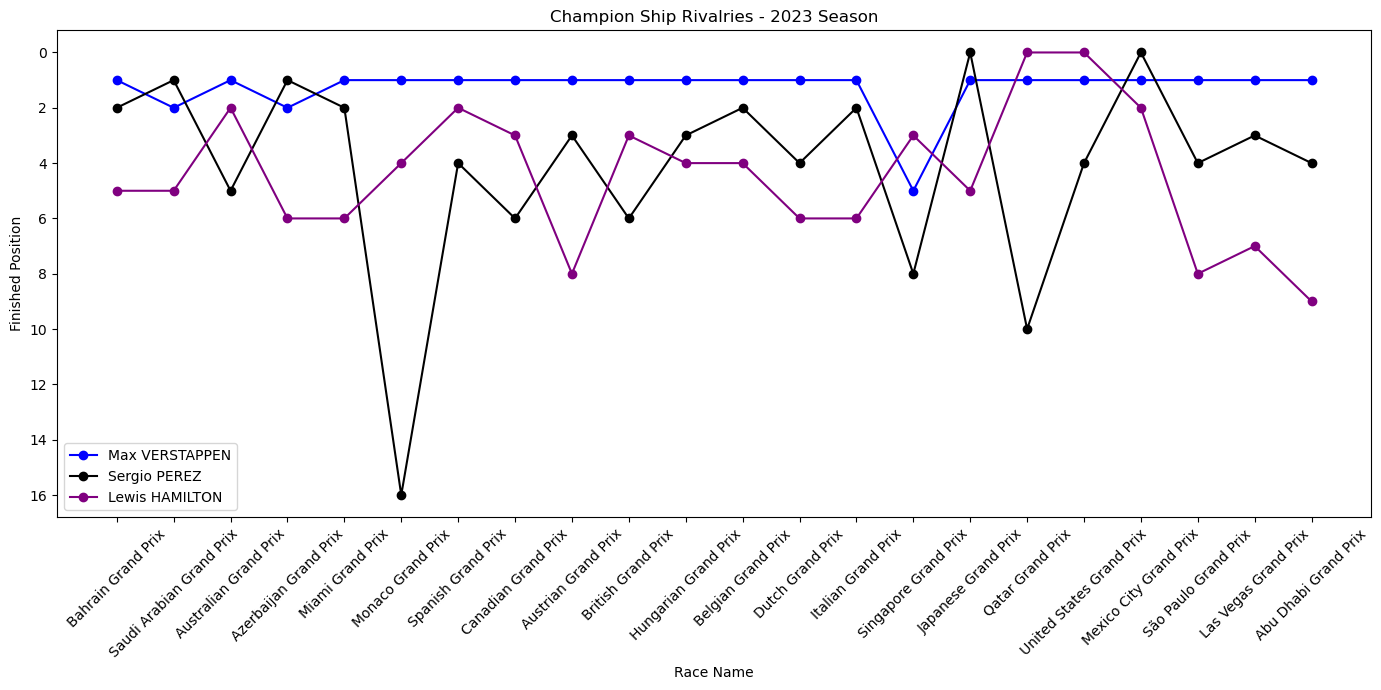

In [60]:
drivers = ['Max VERSTAPPEN', 'Sergio PEREZ', 'Lewis HAMILTON']
colors = ['blue', 'black', 'purple']
plt.figure(figsize=(14,7))
for driver, color in zip(drivers, colors):
    data = df[(df['year'] == 2023) & (df['driver_name'] == driver) & (df['finished_position'] >= 0)]
    plt.plot(data['grandprix'], data['finished_position'], marker='o', color=color, label=driver)
plt.gca().invert_yaxis()  # 1st place at top
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Champion Ship Rivalries - 2023 Season')
plt.xlabel('Race Name')
plt.ylabel('Finished Position')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

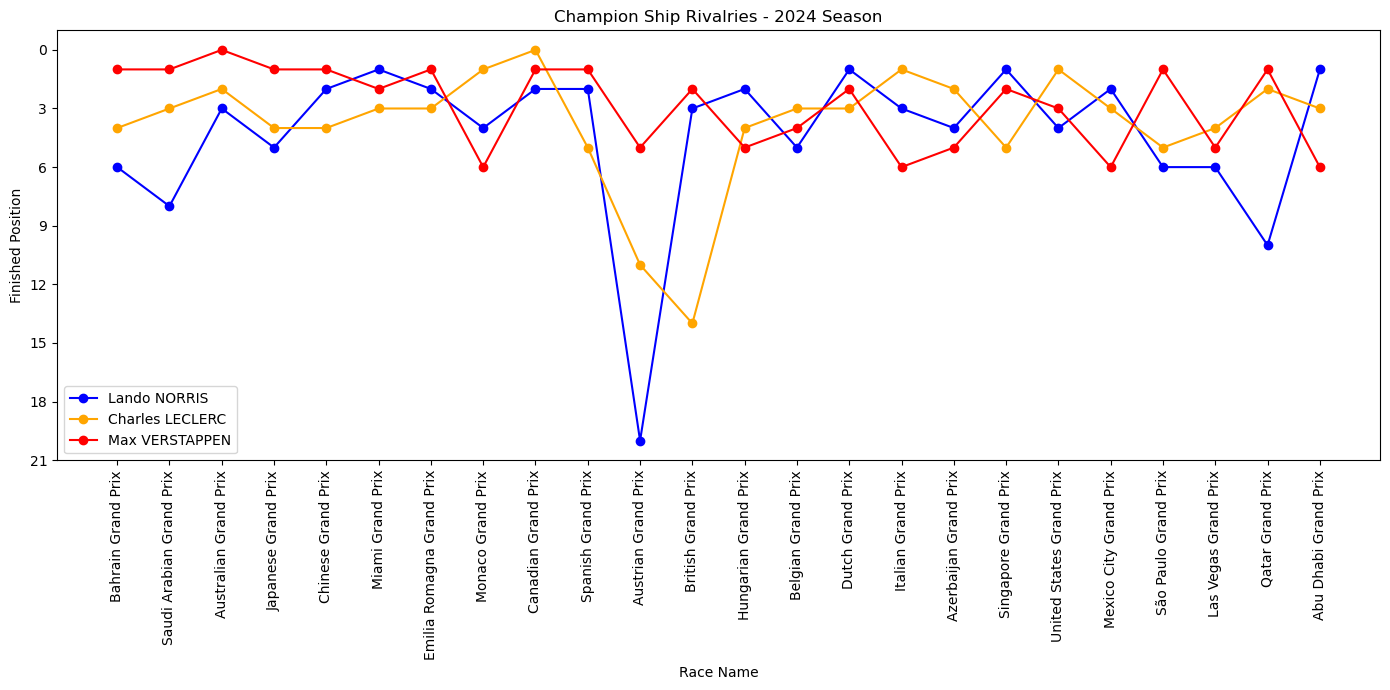

In [61]:
drivers = ['Lando NORRIS', 'Charles LECLERC', 'Max VERSTAPPEN']
colors = ['blue', 'orange', 'red']
plt.figure(figsize=(14,7))
for driver, color in zip(drivers, colors):
    data = df[(df['year'] == 2024) & (df['driver_name'] == driver) & (df['finished_position'] >= 0)]
    plt.plot(data['grandprix'], data['finished_position'], marker='o', color=color, label=driver)
plt.gca().invert_yaxis()  # 1st place at top
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Champion Ship Rivalries - 2024 Season')
plt.xlabel('Race Name')
plt.ylabel('Finished Position')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

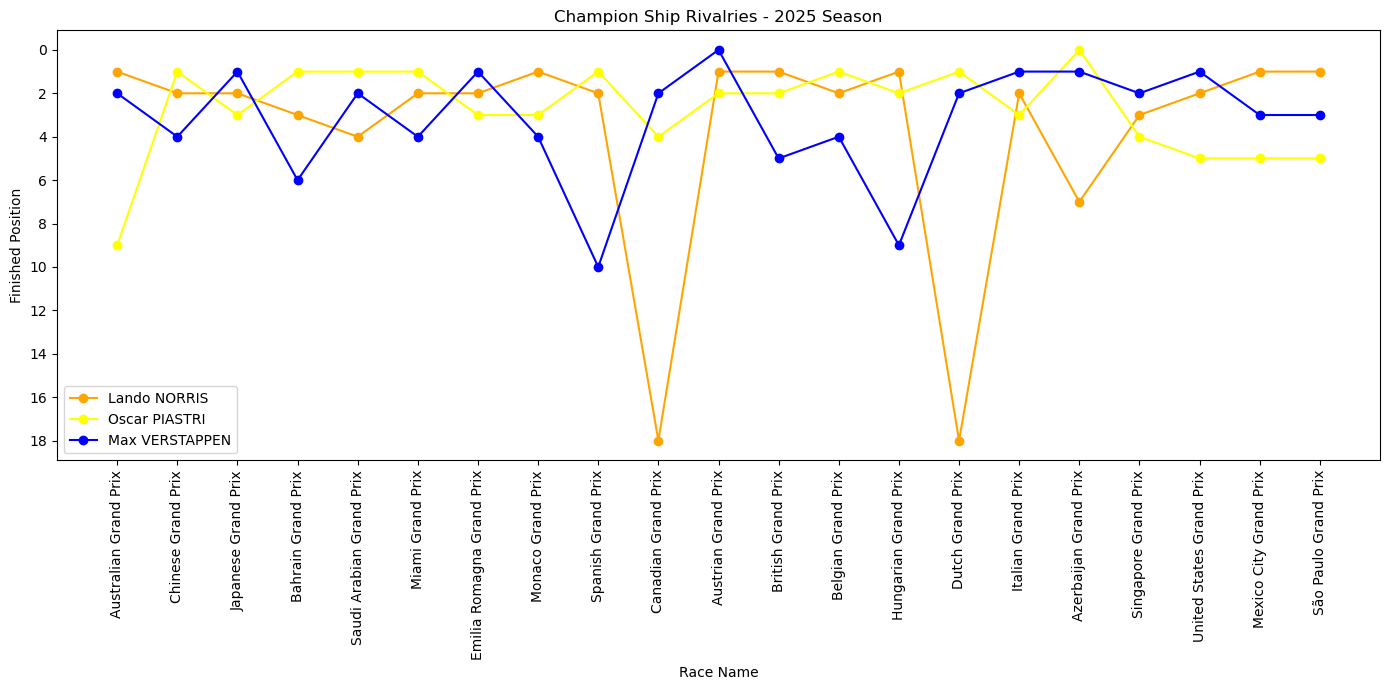

In [62]:
drivers = ['Lando NORRIS', 'Oscar PIASTRI', 'Max VERSTAPPEN']
colors = ['orange', 'yellow', 'blue']
plt.figure(figsize=(14,7))
for driver, color in zip(drivers, colors):
    data = df[(df['year'] == 2025) & (df['driver_name'] == driver) & (df['finished_position'] >= 0)]
    plt.plot(data['grandprix'], data['finished_position'], marker='o', color=color, label=driver)
plt.gca().invert_yaxis()  # 1st place at top
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Champion Ship Rivalries - 2025 Season')
plt.xlabel('Race Name')
plt.ylabel('Finished Position')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
print(f"Total records: {len(df)}")
print(f"Seasons covered: {df['year'].unique()}")
print(f"Unique drivers: {df['driver_name'].nunique()}")

Total records: 1334
Seasons covered: [2023 2024 2025]
Unique drivers: 29


### FEATURE ENGINEERING

In [8]:
# ============ STEP 1: DRIVER PERFORMANCE METRICS ============
print("\n=== STEP 1: Driver Performance Metrics ===")

# Calculate aggregated statistics per driver
driver_stats = df.groupby('driver_name').agg({
    'finished_position': ['mean', 'std', 'count'],
    'grid_position': ['mean', 'std'],
    'fastest_lap_time': 'mean',
    'pitstops': 'mean'
}).reset_index()

driver_stats.columns = ['driver_name', 'avg_finish', 'finish_std', 'race_count', 
                        'avg_grid', 'grid_std', 'avg_fastest_lap', 'avg_pitstops']

# CRITICAL: Calculate podium_rate BEFORE filling NaN values
# Count podiums (positions 1, 2, or 3)
podium_counts = df[df['finished_position'] <= 3].groupby('driver_name').size()
driver_stats['podium_count'] = driver_stats['driver_name'].map(podium_counts).fillna(0)
driver_stats['podium_rate'] = driver_stats['podium_count'] / driver_stats['race_count']

# Calculate win rate (P1 finishes only)
win_counts = df[df['finished_position'] == 1].groupby('driver_name').size()
driver_stats['win_count'] = driver_stats['driver_name'].map(win_counts).fillna(0)
driver_stats['win_rate'] = driver_stats['win_count'] / driver_stats['race_count']

# Calculate DNF rate (Did Not Finish)
dnf_counts = df[df['finished_position'].isna()].groupby('driver_name').size()
driver_stats['dnf_count'] = driver_stats['driver_name'].map(dnf_counts).fillna(0)
driver_stats['dnf_rate'] = driver_stats['dnf_count'] / driver_stats['race_count']

print("\nDriver stats (Top 10 by podium rate):")
print(driver_stats[['driver_name', 'avg_finish', 'podium_rate', 'win_rate', 'dnf_rate']]
      .sort_values('podium_rate', ascending=False).head(10))

print(f"\n✅ Podium_rate unique values: {sorted(driver_stats['podium_rate'].unique())[:10]}")


=== STEP 1: Driver Performance Metrics ===

Driver stats (Top 10 by podium rate):
        driver_name  avg_finish  podium_rate  win_rate  dnf_rate
19   Max VERSTAPPEN    2.507692     0.723077  0.507692  0.030769
15     Lando NORRIS    5.075758     0.560606  0.166667  0.015152
3   Charles LECLERC    4.534483     0.448276  0.051724  0.155172
23    Oscar PIASTRI    5.761905     0.380952  0.142857  0.063492
25     Sergio PEREZ    6.200000     0.325000  0.050000  0.150000
9    George RUSSELL    5.564516     0.225806  0.064516  0.080645
2      Carlos SAINZ    7.224138     0.224138  0.051724  0.120690
16   Lewis HAMILTON    5.766667     0.183333  0.033333  0.116667
6   Fernando ALONSO    8.627119     0.135593  0.000000  0.135593
13   Kimi ANTONELLI    8.562500     0.125000  0.000000  0.250000

✅ Podium_rate unique values: [0.0, 0.016666666666666666, 0.03389830508474576, 0.03508771929824561, 0.05263157894736842, 0.125, 0.13559322033898305, 0.18333333333333332, 0.22413793103448276, 0.225806451

In [9]:
# ============ STEP 2: TRACK-SPECIFIC PERFORMANCE ============
print("\n=== STEP 2: Track-Specific Performance ===")

# How each driver performs on each specific track
track_driver_stats = df.groupby(['driver_name', 'track']).agg({
    'finished_position': ['mean', 'count'],
    'grid_position': 'mean',
    'fastest_lap_time': 'mean'
}).reset_index()

track_driver_stats.columns = ['driver_name', 'track', 'track_avg_finish', 
                              'track_race_count', 'track_avg_grid', 'track_avg_fastest_lap']

# Track-specific podium rate
track_podiums = df[df['finished_position'] <= 3].groupby(['driver_name', 'track']).size().reset_index(name='track_podium_count')
track_driver_stats = track_driver_stats.merge(track_podiums, on=['driver_name', 'track'], how='left')
track_driver_stats['track_podium_count'] = track_driver_stats['track_podium_count'].fillna(0)
track_driver_stats['track_podium_rate'] = track_driver_stats['track_podium_count'] / track_driver_stats['track_race_count']

print("\nSample track-specific stats (Verstappen at different tracks):")
print(track_driver_stats[track_driver_stats['driver_name'] == 'Max VERSTAPPEN']
      [['track', 'track_avg_finish', 'track_podium_rate']].head(10))

print(f"\n✅ Created track-specific features for {len(track_driver_stats)} driver-track combinations")


=== STEP 2: Track-Specific Performance ===

Sample track-specific stats (Verstappen at different tracks):
           track  track_avg_finish  track_podium_rate
398       Austin          1.666667           1.000000
399         Baku          2.666667           0.666667
400    Catalunya          4.000000           0.666667
401  Hungaroring          5.000000           0.333333
402        Imola          1.000000           1.000000
403   Interlagos          1.666667           1.000000
404       Jeddah          1.666667           1.000000
405    Las Vegas          3.000000           0.500000
406       Lusail          1.000000           1.000000
407    Melbourne          1.500000           1.000000

✅ Created track-specific features for 621 driver-track combinations


In [10]:
# ============ STEP 3: RECENT FORM (ROLLING AVERAGES) ============
print("\n=== STEP 3: Recent Form (Last 5 and 3 races) ===")

# Sort by driver and chronological order
df_sorted = df.sort_values(['driver_name', 'year', 'grandprix']).reset_index(drop=True)

# Recent form - average finish in last 5 races
# Use shift(1) to avoid data leakage (don't include current race)
df_sorted['recent_form_5'] = df_sorted.groupby('driver_name')['finished_position'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)
)

# Recent form - average finish in last 3 races
df_sorted['recent_form_3'] = df_sorted.groupby('driver_name')['finished_position'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean().shift(1)
)

# Recent podiums in last 5 races
df_sorted['recent_podiums_5'] = df_sorted.groupby('driver_name')['finished_position'].transform(
    lambda x: (x <= 3).rolling(window=5, min_periods=1).sum().shift(1)
)

# Recent wins in last 5 races
df_sorted['recent_wins_5'] = df_sorted.groupby('driver_name')['finished_position'].transform(
    lambda x: (x == 1).rolling(window=5, min_periods=1).sum().shift(1)
)

print("\nSample recent form for Verstappen (last 10 races):")
print(df_sorted[df_sorted['driver_name'] == 'Max VERSTAPPEN']
      [['grandprix', 'finished_position', 'recent_form_5', 'recent_form_3', 'recent_podiums_5']].tail(10))

print(f"\n✅ Added recent form features with rolling windows")

# Merge driver_stats into main dataframe
df_sorted = df_sorted.merge(driver_stats, on='driver_name', how='left')
df_sorted = df_sorted.merge(track_driver_stats, on=['driver_name', 'track'], how='left')

print("\n" + "="*70)
print("FIRST 3 STEPS COMPLETE!")
print("="*70)
print(f"Features added: avg_finish, finish_std, podium_rate, win_rate, dnf_rate,")
print(f"                track_avg_finish, track_podium_rate, recent_form_5, recent_form_3")
print(f"\nDataframe shape: {df_sorted.shape}")
print(f"Podium_rate values: {sorted(df_sorted['podium_rate'].unique())[:10]}")


=== STEP 3: Recent Form (Last 5 and 3 races) ===

Sample recent form for Verstappen (last 10 races):
                    grandprix  finished_position  recent_form_5  \
884        Italian Grand Prix                1.0            3.6   
885       Japanese Grand Prix                1.0            3.4   
886    Mexico City Grand Prix                3.0            2.8   
887          Miami Grand Prix                4.0            3.0   
888         Monaco Grand Prix                4.0            3.6   
889  Saudi Arabian Grand Prix                2.0            2.6   
890      Singapore Grand Prix                2.0            2.8   
891        Spanish Grand Prix               10.0            3.0   
892      São Paulo Grand Prix                3.0            4.4   
893  United States Grand Prix                1.0            4.2   

     recent_form_3  recent_podiums_5  
884       4.000000               3.0  
885       3.666667               3.0  
886       3.666667               4.0  
887 

In [13]:
# 4. Encode categorical variables
le_track = LabelEncoder()
le_driver = LabelEncoder()
le_track_type = LabelEncoder()
le_wet_dry = LabelEncoder()

In [14]:
df_sorted['track_encoded'] = le_track.fit_transform(df_sorted['track'])
df_sorted['driver_encoded'] = le_driver.fit_transform(df_sorted['driver_name'])
df_sorted['track_type_encoded'] = le_track_type.fit_transform(df_sorted['track_type'])
df_sorted['wet_dry_encoded'] = le_wet_dry.fit_transform(df_sorted['wet_dry'])

In [15]:
print(f"✅ Encoded 4 categorical features:")
print(f"   - {df_sorted['track'].nunique()} unique tracks")
print(f"   - {df_sorted['driver_name'].nunique()} unique drivers")
print(f"   - {df_sorted['track_type'].nunique()} track types")
print(f"   - {df_sorted['wet_dry'].nunique()} weather conditions")

✅ Encoded 4 categorical features:
   - 24 unique tracks
   - 29 unique drivers
   - 2 track types
   - 2 weather conditions


In [ ]:
encoders = {
    'track': le_track,
    'driver': le_driver,
    'track_type': le_track_type,
    'wet_dry': le_wet_dry
}
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)
print("\n✅ Encoders saved to 'label_encoders.pkl'")


✅ Encoders saved to 'label_encoders.pkl'


In [17]:
# Fill missing values for features
fill_columns = ['recent_form_5', 'recent_form_3', 'recent_podiums_5', 'recent_wins_5',
                'track_avg_finish', 'track_avg_grid', 'track_podium_rate',
                'avg_fastest_lap', 'track_avg_fastest_lap']

for col in fill_columns:
    if col in df_sorted.columns:
        df_sorted[col] = df_sorted[col].fillna(0)

# Fill remaining numeric columns with median
numeric_cols = ['fastest_lap_time', 'avg_lap_time', 'avg_sector_1_time', 
                'avg_sector_2_time', 'avg_sector_3_time']
for col in numeric_cols:
    if col in df_sorted.columns:
        df_sorted[col] = df_sorted[col].fillna(df_sorted[col].median())

# Create interaction features
df_sorted['grid_advantage'] = df_sorted['avg_grid'] / (df_sorted['grid_position'] + 0.1)  # Add 0.1 to avoid division by zero
df_sorted['consistency_score'] = 1 / (1 + df_sorted['finish_std'])
df_sorted['performance_momentum'] = (df_sorted['avg_finish'] - df_sorted['recent_form_5']) / (df_sorted['avg_finish'] + 1)
df_sorted['quali_vs_race_gap'] = df_sorted['finished_position'] - df_sorted['grid_position']

print("✅ Missing values filled")
print("✅ Created 4 interaction features")

# NOW fill finished_position NaN with 0 for DNF cases (for model compatibility)
df_sorted['finished_position_clean'] = df_sorted['finished_position'].fillna(25)  # Use 25 for DNFs (beyond last place)

print(f"\n✅ Dataset ready with {len(df_sorted.columns)} total columns")


✅ Missing values filled
✅ Created 4 interaction features

✅ Dataset ready with 48 total columns


In [18]:
feature_columns = [
    # Starting position
    'grid_position',
    
    # Driver historical performance
    'avg_finish',
    'finish_std',
    'race_count',
    'avg_grid',
    'grid_std',
    'avg_pitstops',
    
    # Success rates (MOST IMPORTANT)
    'podium_rate',
    'win_rate',
    'dnf_rate',
    
    # Track-specific
    'track_avg_finish',
    'track_avg_grid',
    'track_podium_rate',
    'track_race_count',
    
    # Recent form
    'recent_form_5',
    'recent_form_3',
    'recent_podiums_5',
    'recent_wins_5',
    
    # Encoded categories
    'track_encoded',
    'track_type_encoded',
    'wet_dry_encoded',
    'driver_encoded',
    
    # Interaction features
    'grid_advantage',
    'consistency_score',
    'performance_momentum',
    
    # Context
    'year'
]

df_train = df_sorted[df_sorted['finished_position'].notna()].copy()

print(f"Total records: {len(df_sorted)}")
print(f"Training records (excluding DNFs): {len(df_train)}")
print(f"DNF records: {len(df_sorted) - len(df_train)}")

# Prepare X (features) and y (target)
X = df_train[feature_columns]
y = df_train['finished_position']

# Handle any remaining NaN in features
X = X.fillna(0)

print(f"\n✅ Feature shape: {X.shape}")
print(f"✅ Target shape: {y.shape}")
print(f"✅ Total features: {len(feature_columns)}")

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTraining set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")


Total records: 1334
Training records (excluding DNFs): 1190
DNF records: 144

✅ Feature shape: (1190, 26)
✅ Target shape: (1190,)
✅ Total features: 26

Training set: 952 samples
Test set: 238 samples


In [20]:
# Build and train Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=200,          # Number of trees in the forest
    max_depth=15,              # Maximum depth of each tree
    min_samples_split=5,       # Min samples to split internal node
    min_samples_leaf=2,        # Min samples in leaf node
    max_features='sqrt',       # Number of features to consider for best split
    bootstrap=True,            # Use bootstrap sampling
    random_state=42,
    n_jobs=-1,                 # Use all CPU cores
    verbose=1                  # Show progress
)

print("Training model...")
rf_model.fit(X_train, y_train)
print("✅ Model training complete!")

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*70)
print("Feature Importance all columns:")
print("="*70)
print(feature_importance.to_string(index=False))

Training model...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.1s


✅ Model training complete!

Feature Importance all columns:
             feature  importance
    track_avg_finish    0.243264
       grid_position    0.092749
          avg_finish    0.089385
         podium_rate    0.069589
       recent_form_5    0.065698
      track_avg_grid    0.063614
      grid_advantage    0.063486
            avg_grid    0.059158
            win_rate    0.057020
   track_podium_rate    0.034185
       recent_form_3    0.032137
performance_momentum    0.022288
       track_encoded    0.014011
    recent_podiums_5    0.013042
            dnf_rate    0.010315
          race_count    0.010277
            grid_std    0.010202
   consistency_score    0.008343
          finish_std    0.007445
                year    0.006561
      driver_encoded    0.006207
        avg_pitstops    0.006172
       recent_wins_5    0.004935
    track_race_count    0.004076
     wet_dry_encoded    0.002927
  track_type_encoded    0.002915


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [21]:


# ============ STEP 8: MODEL EVALUATION ============
print("\n=== STEP 8: Model Evaluation ===")

# Make predictions on test set
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Calculate metrics for TRAIN set
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Calculate metrics for TEST set
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("\n" + "="*70)
print("MODEL PERFORMANCE METRICS")
print("="*70)
print(f"\nTRAINING SET:")
print(f"  Root Mean Squared Error (RMSE): {train_rmse:.3f} positions")
print(f"  Mean Absolute Error (MAE):      {train_mae:.3f} positions")
print(f"  R² Score:                        {train_r2:.3f}")

print(f"\nTEST SET:")
print(f"  Root Mean Squared Error (RMSE): {test_rmse:.3f} positions")
print(f"  Mean Absolute Error (MAE):      {test_mae:.3f} positions")
print(f"  R² Score:                        {test_r2:.3f}")



=== STEP 8: Model Evaluation ===

MODEL PERFORMANCE METRICS

TRAINING SET:
  Root Mean Squared Error (RMSE): 1.498 positions
  Mean Absolute Error (MAE):      1.087 positions
  R² Score:                        0.918

TEST SET:
  Root Mean Squared Error (RMSE): 2.889 positions
  Mean Absolute Error (MAE):      2.011 positions
  R² Score:                        0.700


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


In [22]:

# Cross-validation (5-fold)
print("\n" + "="*70)
print("CROSS-VALIDATION (5-Fold)")
print("="*70)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, 
                            scoring='neg_mean_squared_error', n_jobs=-1)
cv_rmse_scores = np.sqrt(-cv_scores)

print(f"RMSE scores: {cv_rmse_scores}")
print(f"Mean RMSE:   {cv_rmse_scores.mean():.3f} (+/- {cv_rmse_scores.std():.3f})")

# Interpretation
print("\n" + "="*70)
print("INTERPRETATION")
print("="*70)
print(f"The model predicts finishing positions with an average error of ±{test_mae:.2f} positions.")
print(f"For example, if the model predicts P5, the actual position is likely P{5-test_mae:.0f} to P{5+test_mae:.0f}.")
print(f"\nR² Score of {test_r2:.3f} means the model explains {test_r2*100:.1f}% of variance in race results.")

# Check for overfitting
print("\n" + "="*70)
print("OVERFITTING CHECK")
print("="*70)
if train_rmse < test_rmse * 0.7:
    print("⚠️  Warning: Model might be overfitting (train error much lower than test error)")
elif train_rmse > test_rmse * 1.3:
    print("⚠️  Warning: Model might be underfitting (train error higher than test error)")
else:
    print("✅ Good generalization: Train and test errors are similar")

print(f"Train RMSE: {train_rmse:.3f}")
print(f"Test RMSE:  {test_rmse:.3f}")
print(f"Difference: {abs(train_rmse - test_rmse):.3f}")



CROSS-VALIDATION (5-Fold)
RMSE scores: [2.63948708 2.70192657 2.53280283 2.49944701 2.8124066 ]
Mean RMSE:   2.637 (+/- 0.114)

INTERPRETATION
The model predicts finishing positions with an average error of ±2.01 positions.
For example, if the model predicts P5, the actual position is likely P3 to P7.

R² Score of 0.700 means the model explains 70.0% of variance in race results.

OVERFITTING CHECK
⚠️  Warning: Model might be overfitting (train error much lower than test error)
Train RMSE: 1.498
Test RMSE:  2.889
Difference: 1.391


In [24]:
# Save the trained model
with open('f1_random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("✅ Model saved to 'f1_random_forest_model.pkl'")

# Save feature columns
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)

print("✅ Feature columns saved to 'feature_columns.pkl'")

df_sorted.to_csv('f1_data.csv', index=False)
print("✅ Full dataset saved to 'f1_data.csv'")


✅ Model saved to 'f1_random_forest_model.pkl'
✅ Feature columns saved to 'feature_columns.pkl'
✅ Full dataset saved to 'f1_data.csv'
